In [13]:
import pandas as pd
import numpy as np
#import re
import time

#from nltk.help import upenn_tagset
#from nltk.tokenize import TreebankWordTokenizer
#from nltk.tokenize import word_tokenize, sent_tokenize
#from nltk import pos_tag, RegexpParser
#from nltk.corpus import stopwords, wordnet
#from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns

def pline(word):
    print('\n===== ',word,' =====\n')
    
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 100

In [21]:
df0 = pd.read_csv('df0.csv')
df1 = pd.read_csv('df1.csv')

df0.drop(['subject', 'date'], axis=1, inplace=True)
df1.drop(['subject', 'date'], axis=1, inplace=True)

In [15]:
print(df0.info())

#print(df1.head())

# title: raw title
# text: raw text
# title_lm (text_lm): lemmatized title (text), stop word removed
# title_pos (text_pos): pos tags, stop word included
# title_lmpos (text_lmpos): pos tags, stop word removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        20000 non-null  object
 1   text         20000 non-null  object
 2   title_lm     20000 non-null  object
 3   title_pos    20000 non-null  object
 4   title_lmpos  20000 non-null  object
 5   text_lm      20000 non-null  object
 6   text_pos     20000 non-null  object
 7   text_lmpos   20000 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB
None


# Summary of EDA1 and exploration items


1. Title

- Real news
    - Consise and informative summary of the main text
- Fake news
    - **Longer** title
    - **Capitalized** words for non-proper nouns
    - **Teaser, click bait**
        - Induce clicking to see: **"video","watch","image"**
        - **Not enough information** makes reasers feel **curious**
    - Contain **first names**

2. Text
- **3.3% of fake news don't have texts**, and nearly all of them have **"video"** in the title.
- Fake news use **digital source** much more frequently.
- Both real and fake news has **similar amount of raw text**, although whether they are informative or not is different story.


3. Vocabularies of fake news

- Some words closely relate to **discrimination based on demography** are shown more often, however, a few of them are shown in the real news, too.
- Some words, such as **"Boiler, room ep, sunday, episode"** seemed to be about **TV shows**. 

In [22]:
df0['wc_title'] = df0.title.str.split().str.len()
df1['wc_title'] = df1.title.str.split().str.len()
df0['wc_title_lm'] = df0.title_lm.str.split().str.len()
df1['wc_title_lm'] = df1.title_lm.str.split().str.len()
df0['comp_title'] = df0.wc_title_lm / df0.wc_title
df1['comp_title'] = df1.wc_title_lm / df1.wc_title

df0['wc_text'] = df0.text.str.split().str.len()
df1['wc_text'] = df1.text.str.split().str.len()
df0['wc_text_lm'] = df0.text_lm.str.split().str.len()
df1['wc_text_lm'] = df1.text_lm.str.split().str.len()
df0['comp_text'] = df0.wc_text_lm / df0.wc_text
df1['comp_text'] = df1.wc_text_lm / df1.wc_text

In [23]:
df0.head(10)

,title,text,title_lm,title_pos,title_lmpos,text_lm,text_pos,text_lmpos,wc_title,wc_title_lm,comp_title,wc_text,wc_text_lm,comp_text
0,Battle for Rome's beachfront turns bloody with assault on journalist,(Please note: profanity in sixth paragraph) By Isla Binnie ROME (Reuters) - A bloody attack on a journalist has prompted outrage in Italy and put the spotlight on suspected links between extreme ...,battle rome beachfront turn bloody assault journalist,NN IN NN NN NN NNS NN IN NN IN NN,NN NN NN NNS NN NN NN,please note profanity sixth paragraph isla binnie rome bloody attack journalist prompt outrage italy put spotlight suspect link extreme right wing politician organize crime notoriously unruly seas...,NN NN NN IN NNS NN IN NN NN NN DT NN NN IN DT NN VBZ VBN NN IN NN CC NN DT NN IN VBN NNS IN NN NN VBG NNS CC VBN NN IN DT RB RB NN NN IN NN DT JJ NN JJ NN IN NN NN DT NN NN CD NN NN CC DT NN NN NN...,NN NN NN NNS NN NN NN NN NN NN NN VBN NN NN NN NN VBN NNS NN NN VBG NNS VBN NN RB RB NN NN NN JJ NN JJ NN NN NN NN NN CD NN NN NN NN NN JJ NN NN RB VBD JJ NN NN NN NN NN NN NN RB VBN RB IN JJ NN V...,10,7,0.700000,479,283,0.590814
1,"Disclose your donors, South African court tells political parties","JOHANNESBURG (Reuters) - South Africa s political parties should be required to disclose the source of their funding, a court ruled on Wednesday, potentially exposing the patronage networks that h...",disclose donor south african court tell political party,VB PRP$ NNS NN JJ NN NNS JJ NNS,VB NNS NN JJ NN NNS JJ NNS,johannesburg south africa political party require disclose source funding court rule wednesday potentially expose patronage network influence power two decade since apartheid ruling western cape h...,NN NN NN NN JJ NNS MD VB VBN TO VB DT NN IN PRP$ NN DT NN VBN IN NN RB VBG DT NN NNS IN VB VBN NN IN DT CD NNS IN NN DT NN IN DT JJ NN JJ NN WDT NNS NN TO NN NN TO NN NNS VBZ IN NN IN DT NNS WP NN...,NN NN NN JJ NNS VBN VB NN NN NN VBN NN RB VBG NN NNS VBN NN CD NNS IN NN NN JJ NN JJ NN NNS NN NN NN NN NNS VBZ NN NNS NN NN MD NN NN NN NN NN VBD NN NNS NN JJ NN JJ NNS JJ NNS VBN JJ NN NN NN NNS...,9,8,0.888889,264,161,0.609848
2,Democratic state attorneys general decry student loan rework by Republicans,"WASHINGTON (Reuters) - U.S. Education Secretary Betsy DeVos has been reworking student lending since her appointment in February, raising concerns among Democrats that she will undo former Preside...",democratic state attorney general decry student loan rework republican,JJ NN NNS JJ NN NN NN NN IN NNS,JJ NN NNS JJ NN NN NN NN NNS,washington usa education secretary betsy devos rework student lending since appointment february raise concern among democrat undo former president barack obama overhaul college financial aid mond...,NN NN NN NN NN NN VBZ VBN VBG NN NN IN PRP$ NN IN JJ VBG NNS IN NNS IN PRP MD NN JJ NN NN NN NN NN IN NN JJ NN IN NN CD NN NNS JJ DT NNS VBD TO JJ NN VBG PRP$ NN TO NN DT NN NN NN NN IN VBG NN VBG...,NN NN NN NN NN NN VBG NN NN IN NN JJ VBG NNS IN NNS NN JJ NN NN NN NN NN JJ NN NN CD NN NNS JJ NNS VBD JJ NN VBG NN NN NN NN NN VBG NN VBG NNS VBN VB NNS NN JJ NN NN NNS VBG NNS NN NN NN NN VBG NN...,10,9,0.900000,403,253,0.627792
3,Pakistan raps Trump over vow to free doctor who helped track bin Laden,"ISLAMABAD (Reuters) - Pakistan angrily criticized Donald Trump, frontrunner for the U.S. Republican presidential nomination, for saying he would force the country to free a jailed Pakistani doctor...",pakistan rap trump vow free doctor help track bin laden,NN NNS NN IN NN TO JJ NN WP VBD NN NN NN,NN NNS NN NN JJ NN VBD NN NN NN,islamabad pakistan angrily criticize donald trump frontrunner usa republican presidential nomination say would force country free jail pakistani doctor believe help cia hunt al qaeda leader osama ...,NN NN RB VBN NN NN NN IN DT NN JJ JJ NN IN VBG PRP MD NN DT NN TO JJ DT VBN NN NN VBN TO VB VBD DT NN NN RB NN NN NN NN NN NN NN DT CD NN JJ NN JJ NN NN NN NN NN IN NN IN IN VBN PRP MD VB NN TO

Average title length in number of words
Real: 9.95645 +- 1.700381710792708
Fake: 14.74265 +- 4.338785801421085 

Real, cleaned: 8.14685 +- 1.376764268672234
Fake, cleaned: 10.83795 +- 3.2716394940072164 

Average text length in number of words
Real: 385.6909 +- 274.4919090749263
Fake: 422.8571 +- 405.6641254150056 

Real, cleaned: 233.292 +- 164.64401027217997
Fake, cleaned: 239.78665 +- 238.73239493122105 



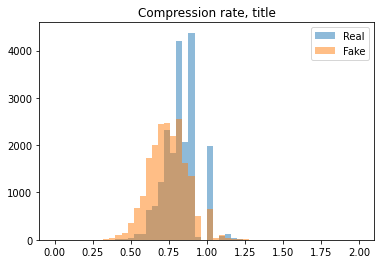

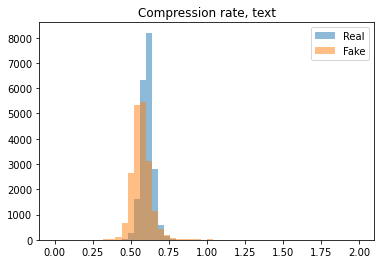

In [32]:
print("Average title length in number of words")
print("Real:", df0.wc_title.mean(),"+-",df0.wc_title.std())
print("Fake:", df1.wc_title.mean(),"+-",df1.wc_title.std(),"\n")
print("Real, cleaned:", df0.wc_title_lm.mean(),"+-",df0.wc_title_lm.std())
print("Fake, cleaned:", df1.wc_title_lm.mean(),"+-",df1.wc_title_lm.std(),"\n")

print("Average text length in number of words")
print("Real:", df0.wc_text.mean(),"+-",df0.wc_text.std())
print("Fake:", df1.wc_text.mean(),"+-",df1.wc_text.std(),"\n")
print("Real, cleaned:", df0.wc_text_lm.mean(),"+-",df0.wc_text_lm.std())
print("Fake, cleaned:", df1.wc_text_lm.mean(),"+-",df1.wc_text_lm.std(),"\n")


plt.hist(df0.comp_title, alpha=0.5, range=(0,2), bins=50)
plt.hist(df1.comp_title, alpha=0.5, range=(0,2), bins=50)
plt.title("Compression rate, title")

plt.legend(['Real','Fake']) 
plt.show()

plt.hist(df0.comp_text, alpha=0.5, range=(0,2), bins=50)
plt.hist(df1.comp_text, alpha=0.5, range=(0,2), bins=50)
plt.title("Compression rate, text")

plt.legend(['Real','Fake'])
plt.show()

In [31]:
# Some compression rates are larger because special characters are removed after lemmatize
df0[df0.comp_title>=1]

,title,text,title_lm,title_pos,title_lmpos,text_lm,text_pos,text_lmpos,wc_title,wc_title_lm,comp_title,wc_text,wc_text_lm,comp_text
9,"House lifts block on Google-hosted apps, Yahoo Mail remains blacklisted",WASHINGTON (Reuters) - The U.S. House of Representatives’ information technology team this week reinstated access on its internet network to software applications hosted on a Google cloud service ...,house lift block google host apps yahoo mail remains blacklist,NN NNS NN IN NN VBN NN NN NN NNS VBN,NN NNS NN NN VBN NN NN NN NNS VBN,washington usa house representative information technology team week reinstate access internet network software application host google cloud service company address potential security fear accord...,NN DT NN NN IN NNS NN NN NN DT NN VBN NN IN PRP$ NN NN TO NN NNS VBN IN DT NN NN NN IN DT NN VBN JJ NN NNS VBG TO DT NN VBN IN NN NN NNS JJ RB CC VBZ VBN VBN IN DT NN NN NN NN VBD IN DT NN CD NN P...,NN NN NN NNS NN NN NN NN VBN NN NN NN NN NNS VBN NN NN NN NN VBN JJ NN NNS VBG NN VBN NN NN NNS JJ RB VBN IN NN NN NN NN VBD NN CD NN VBN NN NN NNS NN CD NNS JJ VBD IN NNS VBN NN IN NNS NN JJ JJ J...,10,10,1.0,289,180,0.622837
10,"South Korea says North Korea must stop challenging peace, end nuclear program",SEOUL (Reuters) - South Korea welcomed on Tuesday a new U.N. Security Council resolution imposing additional sanctions on North Korea over its sixth nuclear test and said the only way for Pyongyan...,south korea say north korea must stop challenge peace end nuclear program,NN NN VBZ NN NN MD NN VBG NN NN JJ NN,NN NN VBZ NN NN MD NN VBG NN NN JJ NN,seoul south korea welcome tuesday new un security council resolution impose additional sanction north korea sixth nuclear test say way pyongyang escape isolation economic hardship end nuclear prog...,NN NN NN VBD IN NN DT JJ NN NN NN NN VBG JJ NNS IN NN NN IN PRP$ NNS JJ NN CC VBD DT RB NN IN NN TO NN NN CC JJ NN VBZ TO NN PRP$ JJ NN NN NN NNS TO VB IN DT NN NN IN JJ NN MD RB NN IN RB JJR JJ N...,NN NN NN VBD NN JJ NN NN NN NN VBG JJ NNS NN NN NNS JJ NN VBD NN NN NN NN JJ NN NN JJ NN NN NN NNS VB NN NN JJ NN NN RB JJR JJ NNS NN JJ NN NN VBD,12,12,1.0,73,46,0.630137
33,"China faces historic corruption battle, ruling party's new graft buster says","SHANGHAI (Reuters) - China must win its battle against corruption or face being erased by history, its new top graft buster said in an editorial on Saturday, underscoring the ruling Communist Part...",china face historic corruption battle ruling party new graft buster say,NN VBZ NN NN NN NN NN NN JJ NN NN VBZ,NN VBZ NN NN NN NN NN JJ NN NN VBZ,shanghai china must win battle corruption face erase history new top graft buster say editorial saturday underscore ruling communist party focus eliminate corrupt behaviour zhao leji appoint new s...,NN NN MD NN PRP$ NN IN NN CC NN VBG VBN IN NN PRP$ JJ NN NN NN VBD IN DT NN IN NN VBG DT NN NN NN NN NN IN VBG NN NN NN NN VBN TO DT JJ CD NN NN VBG NN JJ NN CC NNS TO NN NN NN NN NN NN NN IN NN V...,NN NN MD NN NN NN NN VBN NN JJ NN NN NN VBD NN NN VBG NN NN NN NN VBG NN NN NN NN VBN JJ CD NN NN VBG NN JJ NN NNS NN NN NN NN NN NN NN VBD NN VB NNS JJ NN MD NN NN NN NN NN JJ NN NN NN NN JJ NN V...,11,11,1.0,409,241,0.589242
37,"Tunisian migrant, navy boats collide; eight bodies found","TUNIS/ROME (Reuters) - At least eight people drowned on Monday when a boat carrying dozens of mostly Tunisian migrants collided with a navy vessel off the country s southeast coast, its defense mi...",tunisian migrant navy boat collide eight body found,JJ NN NNS NNS NN CD NNS NN,JJ NN NNS NNS NN CD NNS NN,tunis rome least eight people drown monday boat carry dozen mostly tunisian migrant collide navy vessel country southeast coast defense ministry say accord testimony survivor 70 80 people board in...,NN NN IN JJS CD NNS VBN IN NN WRB DT NN VBG NNS IN RB JJ NNS VBN IN DT NNS NN IN DT NN NN NN NN PRP$ NN NN VBD VBG TO NN IN NNS RB VBD IN CD CC CD NNS IN NN JJ NN IN NN NN NN NN NN NN VBD PRP VBD ...,

## Frequent words - before preprocessing

In [37]:
x = df0.iloc[10].text_lm.split()

print(Counter(x).most_common(100))

[('korea', 3), ('south', 2), ('sanction', 2), ('north', 2), ('nuclear', 2), ('say', 2), ('international', 2), ('seoul', 1), ('welcome', 1), ('tuesday', 1), ('new', 1), ('un', 1), ('security', 1), ('council', 1), ('resolution', 1), ('impose', 1), ('additional', 1), ('sixth', 1), ('test', 1), ('way', 1), ('pyongyang', 1), ('escape', 1), ('isolation', 1), ('economic', 1), ('hardship', 1), ('end', 1), ('program', 1), ('need', 1), ('realize', 1), ('reckless', 1), ('challenge', 1), ('peace', 1), ('bring', 1), ('even', 1), ('strong', 1), ('presidential', 1), ('blue', 1), ('house', 1)]


In [8]:
# Word count without text processing, in case frequently used keywords are not an alphabet, etc
title0 = df0.sample(1000).title.tolist()
title1 = df1.sample(1000).title.tolist()
text0 = df0.sample(1000).text.tolist()
text1 = df1.sample(1000).text.tolist()

def text2words(text):
    
    words_list = []
    
    for sentence in text:
    
        words = word_tokenize(sentence)
    
        for word in words:
            words_list.append(word)

    return words_list

title0 = text2words(title0)
title1 = text2words(title1)
text0 = text2words(text0)
text1 = text2words(text1)

In [9]:
word_counter = Counter(title0)
print('\n===== Title, Real =====\n')
print(word_counter.most_common(100))
print('\n===== Title, Fake =====\n')
word_counter = Counter(title1)
print(word_counter.most_common(100))
print('\n===== Text, Real =====\n')
word_counter = Counter(text0)
print(word_counter.most_common(100))
print('\n===== Text, Fake =====\n')
word_counter = Counter(text1)
print(word_counter.most_common(100))


===== Title, Real =====

[('to', 343), ('Trump', 256), (':', 242), (',', 239), ("'s", 208), ('in', 197), ('U.S.', 195), ('of', 156), ('on', 154), ('says', 145), ("'", 125), ('for', 121), ('with', 86), ('House', 65), ('North', 55), ('as', 55), ('Korea', 49), ('from', 45), ('over', 44), ('White', 40), ('Russia', 40), ('China', 39), ('not', 39), ('Clinton', 38), ('at', 35), ('after', 35), ('Senate', 34), ('will', 33), ('talks', 29), ('and', 29), ('chief', 28), ('EU', 27), ('Republican', 26), ('new', 25), ('bill', 25), ('be', 25), ('Obama', 24), ('Republicans', 24), ('tax', 24), ('by', 24), ('is', 24), ('calls', 23), ('court', 23), ('the', 23), ('probe', 23), ('vote', 23), ('deal', 22), ('U.N.', 22), ('minister', 22), ('attack', 22), ('election', 22), ('a', 21), ('UK', 20), ('nuclear', 20), ('State', 20), ('leader', 19), ('Democrats', 19), ('Congress', 19), ('government', 19), ('PM', 18), ('South', 18), ('Tillerson', 18), ('state', 18), ('Iran', 18), ('against', 18), ('more', 17), ('has',

# Text preprocessing

In [15]:
#word_counter = Counter(df1.title_clean.sum().split())
#word_counter.most_common(20)


# create subplot of the different data frames
#fig, axes = plt.subplots(3,1,figsize=(8,20))
#sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
#sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
#sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))


lst = []

print('=======Real=========')
for x in df0.subject.unique().tolist():
    print('\n',x,'\n')
    print(df0[df0.subject==x].head(10).title)
    print(df0[df0.subject==x].head(10).title_clean)
    
    word_counter = Counter(df0[df0.subject==x].title_clean.sum().split())
    lst.append(['Real',x,word_counter])
    
print('=======Fake=========')    
for x in df1.subject.unique().tolist():
    print('\n',x,'\n')
    print(df1[df1.subject==x].head(10).title)
    print(df1[df1.subject==x].head(10).title_clean)
    
    word_counter = Counter(df1[df1.subject==x].title_clean.sum().split())
    lst.append(['Fake',x,word_counter])
    
for i in range(len(lst)):
    
    pline(lst[i][0])
    pline(lst[i][1])
    print(lst[i][2].most_common(20))

lst = []


word_counter = Counter(df0.title_clean.sum().split())
lst.append(['Real','title',word_counter.most_common(30)])
word_counter = Counter(df1.title_clean.sum().split())
lst.append(['Fake','title',word_counter.most_common(30)])
word_counter = Counter(df0.text_clean.sum().split())
lst.append(['Real','title',word_counter.most_common(30)])
word_counter = Counter(df1.text_clean.sum().split())
lst.append(['Fake','title',word_counter.most_common(30)])

for i in range(len(lst)):
    pline(lst[i][0]+', '+lst[i][1])
    print(lst[i][2])

=======Real=========

 politicsNews 

8144                   U.S. Republican senator moves toward re-election despite Trump tiff
9075              Trump says U.S. should mull more racial profiling after Orlando shooting
4506                                   House Republican tax chief to huddle with Democrats
3826      Trump says 'his decision' to fire FBI chief, calls him 'showboat': NBC interview
5424                            U.S. lawmakers want say on any Trump Russia sanctions move
1888                       U.S. states, immigrant groups to fight Trump's Dreamer decision
4871                   Trump administration crafting big new arms sales to Taiwan: sources
10752               Republican Trump backed Iraq war in 2002 interview, says views changed
7844             Trump intensifies attacks on Ryan with four weeks left until Election Day
727      China's Xi: stable development of China-U.S. economic ties to drive global growth
Name: title, dtype: object
8144             usa repu


=====  Real, title  =====

[('say', 174), ('trump', 155), ('usa', 119), ('court', 51), ('house', 45), ('russia', 42), ('call', 35), ('tax', 34), ('state', 34), ('new', 32), ('seek', 31), ('north', 31), ('plan', 30), ('republican', 27), ('may', 27), ('leader', 27), ('party', 27), ('president', 27), ('talk', 26), ('urge', 26), ('minister', 25), ('deal', 25), ('white', 24), ('korea', 24), ('election', 23), ('clinton', 23), ('vote', 23), ('top', 23), ('bill', 23), ('iran', 23)]

=====  Fake, title  =====

[('trump', 271), ('obama', 84), ('hillary', 79), ('usa', 78), ('clinton', 58), ('room', 56), ('news', 53), ('say', 46), ('president', 45), ('go', 44), ('get', 41), ('new', 39), ('ep', 38), ('america', 35), ('call', 34), ('american', 34), ('want', 33), ('make', 33), ('state', 32), ('medium', 31), ('woman', 31), ('white', 29), ('election', 28), ('show', 28), ('democrat', 28), ('take', 27), ('give', 26), ('attack', 26), ('right', 25), ('black', 25)]

=====  Real, title  =====

[('say', 6275

In [16]:
df1[df1['title_clean'].str.contains('videobreak')]

,title,text,subject,date,title_clean,text_clean


In [18]:
# More stop word at fake news? If so, what kind?
# Different in grammar structure?

stop_words = set(stopwords.words('english'))


#print(stop_words)

title0 = df0.sample(1000).title.tolist()
title1 = df1.sample(1000).title.tolist()
text0 = df0.sample(1000).text.tolist()
text1 = df1.sample(1000).text.tolist()

tokenizer=TreebankWordTokenizer()




def gramma_structure(words):
    
    tags = pos_tag(words)
    tags = [item[1] for item in tags]
      
    stops = [word for word in words if word in stop_words]
    means = [word for word in words if word not in stop_words]
    
    stop_tags = pos_tag(stops)
    stop_tags = [item[1] for item in stop_tags]

    mean_tags = pos_tag(means)
    mean_tags = [item[1] for item in mean_tags]
    
    
    counter_stop = Counter(stops)
    
    counter_mean = Counter(means)
    
    counter_tag = Counter(tags)
    
    counter_stoptag = Counter(stop_tags)
    
    counter_meantag = Counter(mean_tags)
    
    stop_fraction = len(stops)/len(words)
    
    
    return counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction


grammars = []

counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction = gramma_structure(title0)
grammars.append([counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction])
counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction = gramma_structure(title1)
grammars.append([counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction])
counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction = gramma_structure(text0)
grammars.append([counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction])
counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction = gramma_structure(text1)
grammars.append([counter_stop, counter_mean, counter_tag, counter_stoptag, counter_meantag, stop_fraction])

In [19]:
# Title
print('------Stop fraction')
print('Real\n',grammars[0][5])
print('Fake\n',grammars[1][5])

print('------Stop words')
print('Real\n',grammars[0][0].most_common(50))
print('Fake\n',grammars[1][0].most_common(50))

print('------Non-stop words')
print('Real\n',grammars[0][1].most_common(50))
print('Fake\n',grammars[1][1].most_common(50))

print('------Stop words tag')
print('Real\n',grammars[0][3].most_common(100))
print('Fake\n',grammars[1][3].most_common(100))

print('------Non-stop words tag')
print('Real\n',grammars[0][4].most_common(100))
print('Fake\n',grammars[1][4].most_common(100))

------Stop fraction
Real
 0.0
Fake
 0.0
------Stop words
Real
 []
Fake
 []
------Non-stop words
Real
 [('Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday', 2), ("Fired from 'Apprentice,' Omarosa may get Trump White House job", 1), ('House Speaker Ryan says opposes giving Iran access to U.S. dollar', 1), ('Democrats fail to block Arctic reserve oil drilling', 1), ('Restoring legality in Catalonia is Spanish government priority: PM Rajoy', 1), ('U.S. appeals court hears arguments on Trump travel ban', 1), ('Opposition magistrates holed up in Chile residence flee Venezuela: source', 1), ('Philippines president likely to return police to drugs war soon: spokesman', 1), ('Turkey to form closer ties with Iraqi central government after referendum, PM says', 1), ('U.S. senators reach deal on Russia sanctions', 1), ('U.S. Senate Democrats make Trump tax returns a national security issue', 1), ('Trump names China critic Lighthizer as U.S. trade representative', 1)

In [20]:
# Text
print('------Stop fraction')
print('Real\n',grammars[2][5])
print('Fake\n',grammars[3][5])

print('------Stop words')
print('Real\n',grammars[2][0].most_common(50))
print('Fake\n',grammars[3][0].most_common(50))

print('------Non-stop words')
print('Real\n',grammars[2][1].most_common(50))
print('Fake\n',grammars[3][1].most_common(50))

print('------Stop words tag')
print('Real\n',grammars[2][3].most_common(100))
print('Fake\n',grammars[3][3].most_common(100))

print('------Non-stop words tag')
print('Real\n',grammars[2][4].most_common(100))
print('Fake\n',grammars[3][4].most_common(100))

------Stop fraction
Real
 0.0
Fake
 0.0
------Stop words
Real
 []
Fake
 []
------Non-stop words
Real
 [('(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea strategy on tougher economic sanctions, possibly including intercepting cargo ships and punishing Chinese banks doing business with Pyongyang, U.S. officials say. Trump says “things will work out fine” between the United States and 

In [21]:

sentence = df0.sample(1).title.tolist()[0]


print(pos_tag(word_tokenize(sentence)))

[('Cuban', 'NNP'), ('businesswomen', 'NNS'), ('seek', 'VBP'), ('Rubio', 'NNP'), ('meeting', 'NN'), ('as', 'IN'), ('U.S.', 'NNP'), ('policy', 'NN'), ('bites', 'NNS')]


## Text preprocessing

Now we want to explore further with words. To do so, we need to preprocess text first. Let's define useful functions first.

### 

In [22]:
lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('cannot', pos='n')

'cannot'

### Observation 4
- Abbreviation cuts

In [23]:
# Is there any single keywords that repeats a lot?







# Get a random text
text = df.iloc[6][3]

t = ['this is good', 'that is good', 'good hehe', 'this is bad', 'that is bad', 'bad sucks']
l = [0, 0, 0, 1, 1, 1]


counter = CountVectorizer()
counter.fit(t)


print(counter.vocabulary_)
print(counter.transform(t))


    
    

def chunk_counter(pos_text, abbr='NP', n_chunk=30):

    grammar = ''
    
    if abbr == 'Noun':
        grammar = "Noun: {<NN.*>}"
        
    elif abbr == 'Verb':
        grammar = "Verb: {<VB.*>}"
    
    elif abbr == 'Adj':
        grammar = 'Adj: {<JJ.*>}'
        
    elif abbr == 'Adv':
        grammar = 'Adv: {<RB.*>}'    
        
    #grammar = "NP: {<DT>?<JJ>*<NN.*>}" # noun
    #grammar = "VPa: {<DT>?<JJ>*<NN.*><VB.*><RB.?>?}"
    #grammar = "VPb: {<VB.*><DT>?<JJ>*<NN><RB.?>?}" 
    
    else:
        print('Incorrect gabbr')
        return False

        
    # Chunk phrases
    parser = RegexpParser(grammar)
    
    chunks = []
    
    for sentence in pos_text:
        
        chunk = parser.parse(sentence)
        
        for subtree in chunk.subtrees(filter=lambda t: t.label() == abbr):
            chunks.append(tuple(subtree))
        
    # Count phrases
    counter = Counter()

    for chunk in chunks:
        counter[chunk] += 1

    return counter.most_common(10)

print(chunk_counter(pos_text, abbr='Verb'))

NameError: name 'df' is not defined

In [ ]:
vectorizer = CountVectorizer()

vectorizer.fit(text)

X = vectorizer.transform(text)
y = label

print(vectorizer.vocabulary_)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X,y)

In [ ]:
x = df_read.iloc[100]

print(x)

classifier.predict_proba(vectorizer.transform([x.content]))


In [ ]:


def train_test(df0, df1, n_train=100, fake_size=0.5):
    
    n_fake = int(n_train*fake_size)
    n_real = n_train-n_fake
    
    
    # Organize data
    
    train0, test0 = train_test_split(df0, test_size=0.5)
    train1, test1 = train_test_split(df1, test_size=0.5)
 
    train = pd.concat([train0.sample(n=n_train), train1.sample(n=n_train)])    
    test = pd.concat([test0.sample(n=n_real), test1.sample(n=n_fake)])
    
    train_text = train.text.tolist()
    train_labels = train.label.tolist()

    test_text = test.text.tolist()
    test_labels = test.label.tolist()
    
    
    # Training
      
    counter = CountVectorizer()

    counter.fit(train_text+test_text)

    train_counts = counter.transform(train_text)
    test_counts = counter.transform(test_text)

    classifier = MultinomialNB()
    classifier.fit(train_counts,train_labels)
    
    
    # Test
    predict = classifier.predict(test_counts)

    # n: real news, p: fake news
    tn, fp, fn, tp = confusion_matrix(test_labels,predict,labels=[0,1]).ravel()
    
    ac = accuracy_score(test_labels,predict)
    pr = precision_score(test_labels,predict)
    re = recall_score(test_labels,predict)
    f1 = f1_score(test_labels,predict)
    
    # when real news become target
    ipr = tn/(tn+fn)
    ire = tn/(tn+fp)
    if1 = 2*ipr*ire/(ipr+ire)
     
    return tn, fp, fn, tp, ac, pr, re, f1, ipr, ire, if1

#        tn, fp, fn, tp, ac, pr, re, f1, ipr, ire, if1 = train_test(df0, df1, n_train, fake_size)
#        result.append([n_train, fake_size, n_real, n_fake, ac, pr, re, f1, ipr, ire, if1])

#print(train_test(df0, df1, 100, 0.5))

After playing with the 'chunk_counter' function for a few sentences, I noticed that real news have more specific (you can guess topic based on keywords) and objective terms whereas fake news have more subjective and plain (no idea what's topic based on frequent keywords) terms.